In [1]:
import pandas as pd
import sklearn
import datetime
import nltk
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import codecs
from graph import Node, Edge
from gensim.summarization import keywords
from gensim.summarization import summarize
% matplotlib inline
import matplotlib.pyplot as plt
import operator
import nltk

In [2]:
ds = pd.read_csv('data/dailybeast_clean.csv', encoding='utf8', delimiter=',')

In [3]:
# small helpers
def count_words(x):
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')       
    
    headline = tokenizer.tokenize(x.lower())
    
    return len(headline)


def get_tokens(x, use_stemming = False):
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')       
    
    tokens = []
    
    if use_stemming:
        # stemmer = nltk.stem.PorterStemmer()
        stemmer = nltk.stem.SnowballStemmer('english')
        tokens = [stemmer.stem(x) for x in tokenizer.tokenize(x.lower())]
    else:
        tokens = tokenizer.tokenize(x.lower())
             
    return tokens


def topic_words(group_news):
    
    topic_words = {}
    stop_words = nltk.corpus.stopwords.words('english')
    
    for token_list in group_news.apply(get_tokens):
        for token in token_list:
            if token in stop_words:
                continue
            if token in topic_words:
                topic_words[token] += 1
            else:
                topic_words[token] = 1
    return topic_words

In [7]:
# useful info
ds['pub_date'] = ds['timestamp#time'].apply(lambda x: datetime.datetime.fromtimestamp(x))
ds['week'] = ds['pub_date'].apply(lambda x: x.isocalendar()[1])
ds['month'] = ds['pub_date'].apply(lambda x: x.month)
ds['day'] = ds['pub_date'].apply(lambda x: x.day)
ds['h_word_count'] = ds['headline#text'].apply(count_words)
ds['t_word_count'] = ds['text#text'].apply(lambda x: len(x))
ds['hour'] = ds['pub_date'].apply(lambda x: x.hour)
ds['dayofweek'] = ds['pub_date'].apply(lambda x: x.weekday())

In [5]:
# vectorise 'hem all
vect = TfidfVectorizer(stop_words='english', min_df=2)
X = vect.fit_transform(ds['text#text'])
Y = ds['pageViews#output']

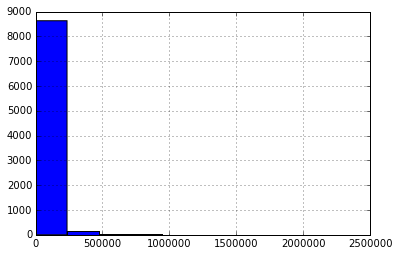

In [20]:
Y.hist()

In [ ]:
import xgboost as xgb

param = {}

param['objective'] = 'reg:linear'
param['eta'] = 0.1
param['max_depth'] = 100
param['silent'] = 1
param['nthread'] = 4

xg_train = xgb.DMatrix( X, label=Y)

xgb.cv(param, xg_train, 50, nfold=5, metrics={'rmse'}, seed = 0)